# Vamos aplicar o que aprendemos sobre pipelines
*   Complete com o código em falta
*   Sempre que necessário, **substitua** ___

---


[documentação](https://scikit-learn.org/stable/index.html) <br>
dataset: [fonte](https://www.kaggle.com/datasets/mirichoi0218/insurance)

---

>[Vamos aplicar o que aprendemos sobre pipelines](#scrollTo=7UqvAzOuK_SN)

>[1. Corra a primeira célula de código para obter o dataframe com que vamos trabalhar](#scrollTo=25DtwghMIQqJ)

>[2. Trate os dados em falta](#scrollTo=glt7JqnNdHxk)

>[3. Faça train_test_split](#scrollTo=Rq7QOxUC9Y4u)

>[4. Aplique o pipeline](#scrollTo=wM4XJr63vizy)



#1.&nbsp;Corra a primeira célula de código para obter o dataframe com que vamos trabalhar

In [1]:
# faça o upload do ficheiro csv associado à atividade

# vamos importar a biblioteca
import pandas as pd
import numpy as np

# vamos importar o dataframe do ficheiro .csv
df = pd.read_csv("C:/Users/yfreitas/Documents/pythonSamples/Machine Learning/Files/insurance.csv")

In [8]:
# veja as 5 primeiras linhas do dataframe
df.head(100)

,age,sex,bmi,children,charges
0,19.0,female,27.900,0,16884.92400
1,18.0,male,33.770,1,1725.55230
2,28.0,male,33.000,3,4449.46200
3,33.0,male,22.705,0,21984.47061
4,32.0,male,28.880,0,3866.85520
...,...,...,...,...,...
95,28.0,female,37.620,1,3766.88380
96,54.0,female,30.800,3,12105.32000
97,55.0,male,38.280,0,10226.28420
98,56.0,male,19.950,0,22412.64850


In [2]:
# veja a forma do dataframe: quantas linhas, quantas colunas?
df.shape
# veja a informação sobre o dataframe
df.info()
# veja a descrição das variáveis numéricas
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1276 non-null   float64
 1   sex       1336 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   region    383 non-null    object 
 5   charges   1338 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 62.8+ KB


,age,bmi,children,charges
count,1276.000000,1338.000000,1338.000000,1338.000000
mean,39.202978,30.663397,1.094918,13270.422265
std,14.051179,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,26.750000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#2.&nbsp;Trate os dados em falta

In [4]:
# remova a coluna quase sem informação
df.drop(columns='region', axis=1, inplace=True)

In [5]:
# remova os dois casos simples
df.dropna(subset=['sex'], inplace=True)

#3.&nbsp;Faça train_test_split

In [6]:
# defina a variável alvo
target_variable = "charges"

# train_test split usando a função train_test_split
X = df.drop(target_variable, axis = 1)
y = df[target_variable]
y.sum()/len(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 12)


#4.&nbsp;Aplique o pipeline

Best parameters found:
{'regressor__max_depth': 2, 'regressor__n_estimators': 100}


0.08840914927187438

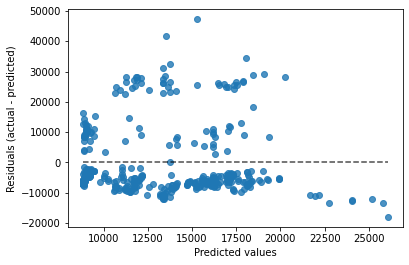

In [7]:
# importe os transformers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

# defina o processamento das variáveis numéricas
numeric_features = ["age", "bmi"]
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# defina o processamento das variáveis categóricas
categorical_features = ["children", "sex"]
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# combine os processos
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

# crie o pipeline com processamento e modelação
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])


# importe a grid search
from sklearn.model_selection import GridSearchCV

# defina os dados para a grid
param_grid = {
    'regressor__n_estimators': [25, 50, 100, 200],
    'regressor__max_depth': [2, 5, 10, 20]
}

# defina as métricas de scoring
scoring = {
    'mse': 'neg_mean_squared_error',
    'r2': 'r2'
}

# construa a grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=scoring, refit='r2')

# faça o fit da grid search
grid_search.fit(X_train, y_train)

# veja os melhores parameters
print("Best parameters found:")
print(grid_search.best_params_)

# obtenha o melhor modelo
best_model = grid_search.best_estimator_

# faça predict usando o melhor modelo
y_pred = best_model.predict(X_test)

# visualize os resíduos
from sklearn.metrics import PredictionErrorDisplay

display = PredictionErrorDisplay(y_true = y_test, y_pred = y_pred)
display.plot()

# importe a lista de métricas
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error,
    r2_score
)

# MAE
mean_absolute_error(y_test, y_pred)

# MSE
mean_squared_error(y_test, y_pred)

# RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

# MAPE
mean_absolute_percentage_error(y_test, y_pred)

# R2
r2_score(y_test, y_pred)